# The Project #
1. This is a project with minimal scaffolding. Expect to use the the discussion forums to gain insights! It’s not cheating to ask others for opinions or perspectives!
2. Be inquisitive, try out new things.
3. Use the previous modules for insights into how to complete the functions! You'll have to combine Pillow, OpenCV, and Pytesseract
4. There are hints provided in Coursera, feel free to explore the hints if needed. Each hint provide progressively more details on how to solve the issue. This project is intended to be comprehensive and difficult if you do it without the hints.

### The Assignment ###
Take a [ZIP file](https://en.wikipedia.org/wiki/Zip_(file_format)) of images and process them, using a [library built into python](https://docs.python.org/3/library/zipfile.html) that you need to learn how to use. A ZIP file takes several different files and compresses them, thus saving space, into one single file. The files in the ZIP file we provide are newspaper images (like you saw in week 3). Your task is to write python code which allows one to search through the images looking for the occurrences of keywords and faces. E.g. if you search for "pizza" it will return a contact sheet of all of the faces which were located on the newspaper page which mentions "pizza". This will test your ability to learn a new ([library](https://docs.python.org/3/library/zipfile.html)), your ability to use OpenCV to detect faces, your ability to use tesseract to do optical character recognition, and your ability to use PIL to composite images together into contact sheets.

Each page of the newspapers is saved as a single PNG image in a file called [images.zip](./readonly/images.zip). These newspapers are in english, and contain a variety of stories, advertisements and images. Note: This file is fairly large (~200 MB) and may take some time to work with, I would encourage you to use [small_img.zip](./readonly/small_img.zip) for testing.

Here's an example of the output expected. Using the [small_img.zip](./readonly/small_img.zip) file, if I search for the string "Christopher" I should see the following image:
![Christopher Search](./readonly/small_project.png)
If I were to use the [images.zip](./readonly/images.zip) file and search for "Mark" I should see the following image (note that there are times when there are no faces on a page, but a word is found!):
![Mark Search](./readonly/large_project.png)

Note: That big file can take some time to process - for me it took nearly ten minutes! Use the small one for testing.

## My Project ##

This notebook is the final version of my project with the code complete and together, another workbook is available with the individual steps taken through the process of this assignment.

In [1]:
pip install pytesseract

Note: you may need to restart the kernel to use updated packages.


## Given Starting Code ##
Starting code given for assignment was run.

As I was running pytesseract on my local machine rather than coursera platform, local folder address given

In [1]:
import zipfile

from PIL import Image, ImageDraw
import pytesseract
import cv2 as cv
import numpy as np

# loading the face detection classifier
face_cascade = cv.CascadeClassifier('readonly/haarcascade_frontalface_default.xml')

# the rest is up to you!

In [2]:
#pyteseract folder for on my local machine
pytesseract.pytesseract.tesseract_cmd = r'C:\Program Files\Tesseract-OCR\tesseract.exe'

# Function for Searching Zipfiles #

## Project ##
The function **project** takes 2 inputs of **Zip file Name (zip_name)** & **The Keyword (key_word)** search term.

It returns an image contact sheet of the faces located on images which mention the keyword search term.

## 1 - Open Images ##
The images were opened from the zipfile and saved to a dictionary 

## 2 - Perform OCR ##
Perfrom OCR on the images to get the text from the images. If match found against **key_word** print result.

## 3 - Face Detection ##
Inputs for the detectMultiscale:
A Scale factor of 1.31 Selected, after varying this value between 1.2 and 1.5 the final value of 1.31 was selected to give a match to the assignment.

Minimum neighbours - After some variance the value of 5 was chosen for this parameter.

## 4 - Contact Sheet ##
Create the thumbnails on the contact sheet 

Thumbnail size to be 110x110 to match the example with 5 thumbnails per row.



In [3]:
def project(zip_name, key_word):
    
### Open the files in the zipfile and save to dictionary ###

    with zipfile.ZipFile(zip_name) as project_zip:
        pic_names = project_zip.namelist()

        dict_images = {}
        for pic in pic_names:
            dict_images[pic] = Image.open(project_zip.open(pic))

### Perform OCR to get the txt from the images ###

    for pic in pic_names:
        image = dict_images[pic]
        text = pytesseract.image_to_string(image)

        if key_word in text:
            print("Results found in file", pic)

### Face detection within images that contain the text string searched for ###

            try: 
                faces = (face_cascade.detectMultiScale(np.array(image), 1.31, 5)).tolist()
                faces_sheet = []
                for (x,y,width,height) in faces:
                    faces_sheet.append(image.crop((x,y,x+width,y+height)))
                
### Create contact sheet with the faces found. ###

                contact_sheet = Image.new(image.mode, (550,110*int(np.ceil(len(faces_sheet)/5))))
                x = 0
                y = 0
                for face in faces_sheet:
                    face.thumbnail((110,110))
                    contact_sheet.paste(face, (x,y))

                    if x+110 == contact_sheet.width:
                        x=0
                        y+=110
                    else:
                        x+=110
                display(contact_sheet)
            except:
                print("But there were no faces found in that file!")

## Search Results ##

Run searches using the function to determine results. Search terms required as project goals are: 
* Christopher in the small_img Zipfile
* Mark in the images Zipfile

The results match up well to the initial assignment.

To run type:
**project(zip_name, 'key_word')**

Results found in file a-0.png


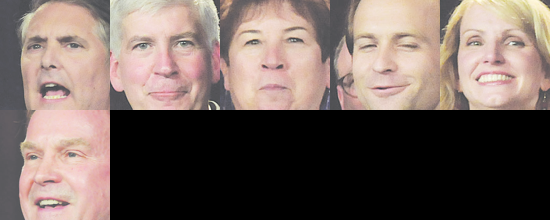

Results found in file a-3.png


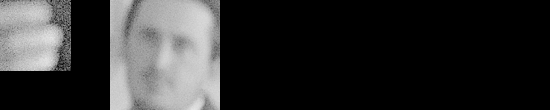

In [4]:
project('small_img.zip', 'Christopher')

Results found in file a-0.png


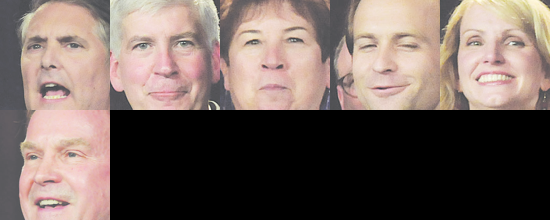

Results found in file a-1.png


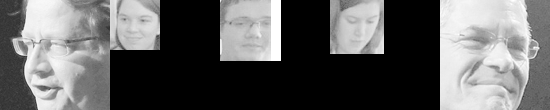

Results found in file a-10.png
But there were no faces found in that file!
Results found in file a-13.png


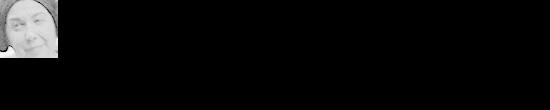

Results found in file a-2.png


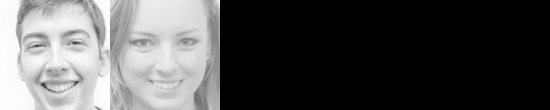

Results found in file a-3.png


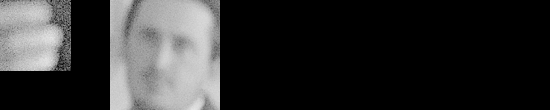

Results found in file a-8.png
But there were no faces found in that file!


In [5]:
project('images.zip', 'Mark')

# HINTS #
Some Hints that were provided withing the course

### HINT 1 ###
To access the newspapers in the zipfile, you must first use the Zipfile library to open the zipfile then iterate through the objects (newspapers) in the zipfile using .infolist().

Try and write a simple routine to just go through the zipfile, printing out the name of the file as well as using display().

Remember that the PIL.Image library can .open() files, and that items in .infolist() in the zipfile each appear to Python just as if they were a file (these are called "file-like" objects). 

### HINT 2 ###
You can spend a lot of time converting between PIL.Image files and byte arrays, but you don't have to. 
Why not just store the PIL.Image objects in a **global data structure**, maybe a list or a dictionary indexed by name? 
Then you can further process this data structure, by adding in information such as the text detected on the pages or the bounding boxes behind faces.  

Come to think of it, a **list of dictionary objects**, where each entry in the list would have the PIL image, the bounding boxes, and the text discovered on the page, would be a handy way to store this data.

### HINT 3 ###
A quick reminder - in Python all strings are just like lists of characters. 

Kind of (remember they are immutable lists - more like tuples!). But this means you can use the in keyword to find substrings really easily. 
So the following statement will return True if the substring is matched: **if "Christopher" in my_text**

### HINT 4 ###
Creating the **contact sheet** can be a bit of a pain. But you can resize images without having to worry about the aspect ratio if you use the PIL.Image.thumbnail function. I used it when creating out the output images, maybe you should too! And check out the lecture on the contact sheet, you want to be careful that you don't "walk off" the end of the images when creating a row (or column). 